# CNN- Convolutional Neural Network

A convolutional neural network (CNN or ConvNet), is a network architecture for deep learning which learns directly from data, eliminating the need for manual feature extraction.

CNNs are particularly useful for finding patterns in images to recognize objects, faces, and scenes. They can also be quite effective for classifying non-image data such as audio, time series, and signal data.

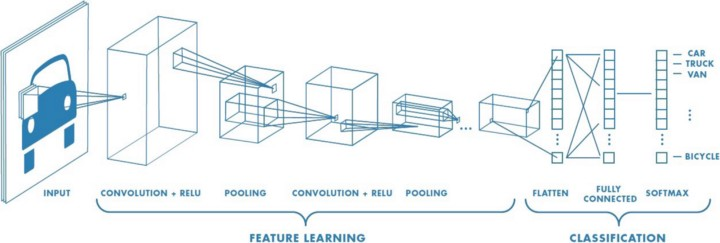


Working of CNN
Generally, a Convolutional Neural Network has three layers, which are as follows;

    .Input: If the image consists of 32 widths, 32 height encompassing three R, G, B channels, then it will hold the raw pixel([32x32x3]) values of an image.
    
    .Convolution: It computes the output of those neurons, which are associated with input's local regions, such that each neuron will calculate a dot product in between weights and a small region to which they are actually linked to in the input volume. For example, if we choose to incorporate 12 filters, then it will result in a volume of [32x32x12].
    
    .ReLU Layer: It is specially used to apply an activation function elementwise, like as max (0, x) thresholding at zero. It results in ([32x32x12]), which relates to an unchanged size of the volume.
    
    .Pooling: This layer is used to perform a downsampling operation along the spatial dimensions (width, height) that results in [16x16x12] volume.
    
   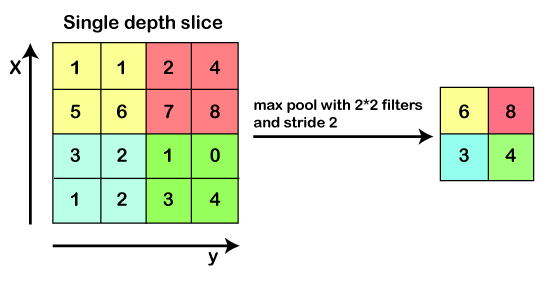
    
    .Locally Connected: It can be defined as a regular neural network layer that receives an input from the preceding layer followed by computing the class scores and results in a 1-Dimensional array that has the equal size to that of the number of classes.
    

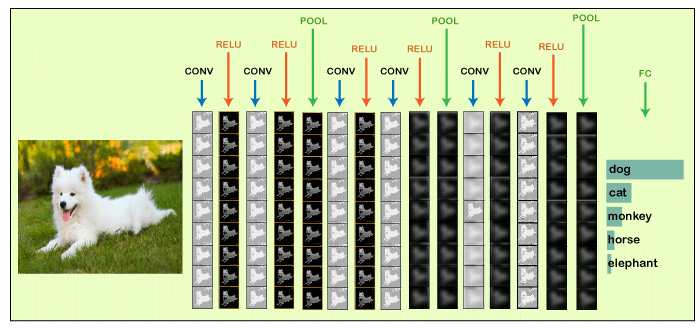

We will start with an input image to which we will be applying multiple feature detectors, which are also called as filters to create the feature maps that comprises of a Convolution layer. Then on the top of that layer, we will be applying the ReLU or Rectified Linear Unit to remove any linearity or increase non-linearity in our images.

Next, we will apply a Pooling layer to our Convolutional layer, so that from every feature map we create a Pooled feature map as the main purpose of the pooling layer is to make sure that we have spatial invariance in our images. It also helps to reduce the size of our images as well as avoid any kind of overfitting of our data. After that, we will flatten all of our pooled images into one long vector or column of all of these values, followed by inputting these values into our artificial neural network. Lastly, we will feed it into the locally connected layer to achieve the final output.



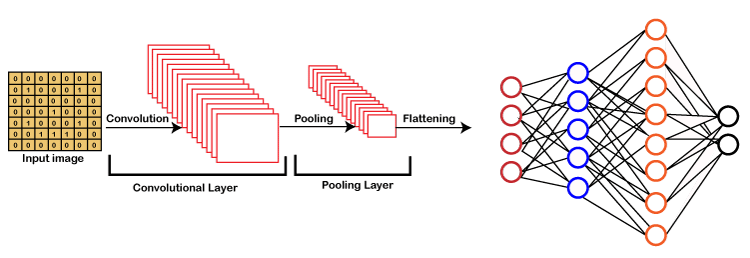

In [1]:
import tensorflow as tf  
from keras.preprocessing.image import ImageDataGenerator 

## Part1: Data Pre-processing

Preprocessing the Training set

We will apply some transformations on all the images of the training set but not on the images of the test set, so as to avoid overfitting. Indeed, if we don't apply these transformations while training our CNN on the training set, we will get a huge difference between the accuracy on the training set and the one on the test set.

For the computer vision, the way to avoid overfitting is to apply the transformations, which are nothing but a simple geometrical transformation or some zoom or some rotations on the images. So, basically, we are going to apply some geometrical transformations to shift some of the pixels followed by rotating a bit the images, we will be doing some horizontal flips, zoom in as well as zoom out. We are actually going to apply some series of transformations to modify the images and get them augmented, which is called image augmentation. It actually consists of transforming the images of the training set so that our CNN model doesn't overlearn.

We will create an object of train_datagen of the ImageDataGenerator class that represents the tool that will apply all the transformations on the images of the training set, such that the rescale argument will apply feature scaling to each and every single one the pixel by dividing their value 255 as each pixel take a value between 0 and 255, which is really necessary for neural networks and the rest are the transformations that will perform image augmentation on the training set images so as to prevent the overfitting.

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,  
                                   shear_range = 0.2,  
                                   zoom_range = 0.2,  
                                   horizontal_flip = True)  

After this, we will need to connect the train_datagen object to the training set, and to do this, we will have to import the training set, which can be done as given below. Here training_set is the name of the training set that we are importing in the notebook, and then we indeed take our train_datagen object so as to call the method of ImageDataGenerator class. The method that we will call is the flow_from_directory that will help to connect the image augmentation tool to the image of the training set. we will pass the following parameter;

The first parameter is the path leading to the training set.
The next parameter is the target_size, which is the final size of the images when they will be fed into the convolutional neural network.
The third one is the batch_size, which relates to the size of the batches, i.e., the total number of images we want to have in each batch. We have chosen 32, which is the classic default value.
Lastly, we will classify the class mode to be either binary or categorical. Since we are looking for a binary outcome, so will choose binary class mode.

In [5]:
training_set = train_datagen.flow_from_directory('CNN_Dataset/train/',  
                                                 target_size = (64, 64),  
                                                 batch_size = 32,  
                                                 class_mode = 'binary')  

Found 8002 images belonging to 2 classes.


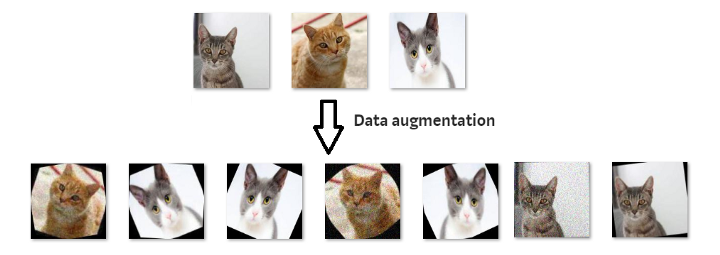

### Preprocessing the Test set

After we are done with preprocessing the training set, we will further move on to preprocessing the test set. We will again take the ImageDataGenerator object to apply transformations to the test images, but here we will not apply the same transformations as we did in the previous step. However, we need to rescale their pixels the same as before because the future predict method of CNN will have to be applied to the same scaling as the one that was applied to the training set.

In [3]:
test_datagen = ImageDataGenerator(rescale = 1./255)  

Here test_set is the name of the test set that we are importing in the notebook, and then we indeed take our test_datagen, which will only apply if it is going to the pixels of the test set images. Then we call the same flow_from_directory function to access the test set from the directory. Then we will need to have the same target_size, batch_size, and class_mode as used in the previous step.

In [4]:
test_set = test_datagen.flow_from_directory(directory="CNN_Dataset/test/", 
                                            target_size = (64, 64),  
                                            batch_size = 32,  
                                            class_mode = 'binary')  

Found 2000 images belonging to 2 classes.


## Part2: Building the CNN

In part two, we are going to build together the convolutional neural network and, more specifically, the whole architecture of the artificial neural network. So, it is actually going to start the same as with our artificial neural network because the convolutional neural network is still a sequence of layers.

Therefore, we are going to initialize our CNN with the same class, which is the sequential class.

#### Initializing the CNN

So, this is the first step where we are not only going to call the sequential mclass but will actually create the cnn variable, which will represent this convolutional neural network. And this cnn variable will be created once again as an instance of that sequential class allows us to create an artificial neural network as a sequence of layers.

First, we will need to call the TensorFlow that has a shortcut tf from which we are going to call Keras library from where we are going to get access to the model's module, or we can say from where we are going to call that sequential class.m

In [6]:
cnn = tf.keras.models.Sequential()  

After this, we will step by step use the add method to add different layers, whether they are convolutional layers or fully connected layers, and in the end, the output layer. So, we are now going to successfully use the add method starting with the step1: convolution.

### Step1: Convolution

We will first take the cnn object or the convolutional neural network from which we will call the add method to add our very first convolutional layer, which will further be an object of a certain class, i.e., Conv2D class. And this class, just like the dense class that allows us to build a fully connected layer, belongs to the same module, which is the layer module from the Keras library, but this time it is the TensorFlow.

Inside the class, we are going to pass three important parameters, which are as follows:

The first parameter is the filters, which is the number of feature detectors that we want to apply to images for feature detection.
The kernel_size is exactly the size of the feature detector, i.e., the number of rows, which is also the number of columns.
The third one is the activation but here we are not going to keep the default value for the activation parameter corresponding to the activation function, because indeed as long as we don't reach the output layer, we rather want to get a rectifier activation function. That is why we will choose the ReLU parameter name once again as it corresponds to the rectifier activation function.
Lastly, the input_shape parameter because it is necessary to specify the input shape of inputs. Since we are working with the colored images, so the input_shape will be [64, 64, 3].

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))  

### Step2: Pooling

Next, we will move on to applying pooling, and more specifically, if we talk about, we are going to apply the max pooling, and for that, we will again take cnn object from which we are going to call our new method. Since we are adding the pooling layer to our convolutional layer, so we will again call the add method, and inside it, we will create an object of a max-pooling layer or an instance of a certain class, which is called MaxPool2D class. Inside the class, we will pass pool_size and strides parameters.

In [8]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))  

#### Adding a second layer

Now we will add our second layer, for which again we have to undergo applying convolutional as well as pooling layer just like we did in the previous step, but here will need to change the input_shape parameter because it is entered only when we add our very first layer to automatically connect that first layer to the input layer, which automatically adds the input layer.

Since we are already here adding the second convolution layer, so we can simply remove that parameter. So, we are all set to move on to step3.

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))  
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))  

### Step3: Flattening

In the third step, we will undergo flattening the result of these convolutions and pooling into a one-dimensional vector, which will become the input of a fully connected layer neural network in a similar way as we did in the previous section. We will start with again taking our cnn object from which we will call the add method because the way we are going to create that flattening layer is once again by creating an instance of the Flatten class, such that Keras will automatically understand that this is the result of all these convolutions and pooling, which will be flattened into the one-dimensional vector.

So, we just need to specify that we want to apply flattening and to do this we will have to call once again the layers module by the Keras library by TensorFlow from which we are actually going to call the flatten class, and we don't need to pass any kind of parameter inside it.

In [11]:
cnn.add(tf.keras.layers.Flatten())  

### Step4: Full Conversion

In step 4, we are exactly in the same situation as before building a fully connected neural network. So, we will be adding a new fully-connected layer to that flatten layer, which is nothing but a one-dimensional vector that will become the input of a fully connected neural network. And for this, we will again start by taking a cnn neural network from which we are going to call the add method because now we are about to add a new layer, which is a fully connected layer that belongs to tf.keras.layers. But this time, we will take a Dense class followed by passing units, which is the number of hidden neurons we want to have into this fully connected layer and activation function parameter.

In [12]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))  

### Step5: Output Layer

Here we need to add the final output layer, which will be fully connected to the previous hidden layer. Therefore, we will call the Dense class once again in the same way as we did in the previous step but will change the value of the input parameters because the numbers of units in the output layer are definitely not 128. Since we are doing binary classification, it will actually be one neuron to encode that binary class into a 'cat' or 'dog'. And for the activation layer, it is recommended to have a sigmoid activation function. Otherwise, if we were doing multiclass classification, we would have used the SoftMax activation function.

In [13]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) 

### Part3: Training the CNN

In the previous steps, we built the brain the, which contained in the eyes of the Artificial Intelligence and now we are going to make that brain smart with the training of CNN on all our training set images, and at the same time, we will evaluate our same model on the test set over the epochs. Now we are going to train our CNN over 25 epochs, and at each epoch, we will actually see how our model is performing on our test set images. This is a different kind of training as we did before because we always used to separate the training and evaluation, but here this will happen at the same time as we are making some specific application, i.e., computer vision.

#### Compiling the CNN

Now we are going to compile the CNN, which means that we are going to connect it to an optimizer, a loss function, and some metrics. As we are doing once again a binary classification, so we are going to compile our CNN exactly the same way as we complied our ANN model because indeed, we are going to choose once again adam optimizer to perform stochastic gradient descent to update the weights in order to reduce the loss error between the predictions and target. Then we will choose the same loss, i.e., the binary_crossentrophy loss because we are doing exactly the same task binary classification. And then same for the metrics, we will choose accuracy metrics because it is the most relevant way to measure the performance of the classification model, which is exactly our case of CNN.

So, we will take our cnn from which we will be calling the compile method that will take as input the optimizer, loss function, and the metrics.

In [14]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])  

#### Training the CNN on the Training set and evaluation on the Test set

After the compilation, we will train the CNN on the training set followed by evaluating at the same time on the test set, which will not be exactly the same as before but will be somewhat similar. Basically, the first two steps are always the same, i.e., in the first step, we will take cnn followed by taking the fit method in the second step that will train the cnn on the training set. Inside it, we will pass the following parameters:

The first parameter is the set, which is off course the dataset (training set) on which we are going to train our model, and the name for that parameter is simply X, created in part1.
The second parameter is the difference with what we did before. So, it has to do, of course with the fact that we are not only training the CNN on the training set but also evaluating it at the same time on the test set. And that is what exactly our second parameter corresponds to, so we will be specifying here the validation data (test set), which is the set on which we want to evaluate our CNN.
Lastly, the epochs parameter, which is the number of epochs. Here we are choosing 25 epochs to converge the accuracy not only on the training set but also on the test set.

In [15]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25) 

Epoch 1/25
251/251 [==============================] - 206s 813ms/step - loss: 0.6710 - accuracy: 0.5802 - val_loss: 0.6158 - val_accuracy: 0.6490
Epoch 2/25
251/251 [==============================] - 66s 264ms/step - loss: 0.6015 - accuracy: 0.6781 - val_loss: 0.5621 - val_accuracy: 0.7000
Epoch 3/25
251/251 [==============================] - 68s 271ms/step - loss: 0.5611 - accuracy: 0.7117 - val_loss: 0.5553 - val_accuracy: 0.7270
Epoch 4/25
251/251 [==============================] - 68s 272ms/step - loss: 0.5385 - accuracy: 0.7243 - val_loss: 0.5228 - val_accuracy: 0.7360
Epoch 5/25
251/251 [==============================] - 69s 273ms/step - loss: 0.5085 - accuracy: 0.7457 - val_loss: 0.4622 - val_accuracy: 0.7720
Epoch 6/25
251/251 [==============================] - 70s 278ms/step - loss: 0.4945 - accuracy: 0.7612 - val_loss: 0.5152 - val_accuracy: 0.7490
Epoch 7/25
251/251 [==============================] - 71s 281ms/step - loss: 0.4768 - accuracy: 0.7703 - val_loss: 0.5678 - val_a

From the image given above, it can be seen that we ended with 90% of final accuracy on the training set and final accuracy of 80.50%on the test set. Let's remind it again that if we had not done image augmentation preprocessing in part1, we would have ended up with an accuracy of around 98% or even 99% on the training set, which clearly indicates overfitting and lower accuracy here on the test set around 70%. This is the reason why we insisted image augmentation is absolutely fundamental.

### Part4: Making a single prediction

In part4, we will make a single prediction, which actually consists of deploying our model on the two separate images of this single prediction folder for which our model will have to recognize for both the dog and cat, respectively. So, basically, we will deploy our CNN model on each of these single images, and we will hope that our CNN successfully predicts a dog as well as a cat. And for this, we will start with importing NumPy. Next, we will import a new module that we actually imported earlier, i.e., we imported the ImageDataGenerator from the image submodule of the preprocessing module of the Keras library. And in fact, what we are going to import now is that image module. But because we specifically imported something specific from that module, well, we need to import it again.

So, we will start with Keras, which we will help us to get access to the preprocessing module from which we will further import that image module. The next is, of course, to load that single image on which we want to deploy our model to predict if there is a cat or dog inside. We will create a new variable, i.e., the test_set that will be initialized with loading the image on which we want to test out model from the same single prediction folder. It can be done by first calling the image submodule from which we will call the load_img function, and inside this function, we will simply pass two arguments, i.e., the first parameter is the path specifying that particular image we want to select which will actually lead us to the test_set image variable and the second one plays a vital role as it relates to the image which will become the input of the predict method has to have the same size as the one that was used during the training.

Since we actually resized our images into the size target of (64, 64), whether it was for the training set or test set and we also specify it again while building the CNN with the same input shape, so the size of the image we are going to work with either for training the CNN or calling the predict method has to be (64, 64). So, in order to specify it here, we will enter our second parameter, which is the target_size.

In [16]:

import numpy as np  
from keras.preprocessing import image  
from tensorflow.keras.preprocessing.image import load_img,img_to_array
test_image = load_img('CNN_Dataset/prediction/1.jpg', target_size = (64, 64))  

But to make our first test _set image accepted by the predict method, we need to convert the format of an image into an array because the predict method expects its input to be a 2D array. And we will do this with the help of another function of the image preprocessing module, i.e., img_to_array function, which indeed converts PIL image instance into a NumPy array that is exactly the format of array expected by the predict method. We will again use our image submodule from which we will call img_to_array(), and inside, it will take the test_size image in PIL format that we are looking forward to convert it into the NumPy array format.

In [55]:
test_image = img_to_array(test_image)  

Since the predict method has to be called on the exact same format that was used during the training, so if we go back into the preprocessing phase of both training set as well as the test set, we created batches of images. Therefore, our CNN was not trained in any single image; rather, it was trained on the batches of images. So, as we have an extra dimension of batch and we are about to deploy our model on a single image, then that single image still has to be into the batch even if we are going to have one image in the batch, it has to be into this batch so that the predict method of our CNN model can recognize the batch as that extra dimension.

Next, we will add an extra dimension, which will correspond to the batch that will contain that image into the batch, and it can be simply done by updating our test image by adding extra dimensions corresponding to batch. And the way to do it is with NumPy as the NumPy arrays can be easily manipulated, so we will first call the NumPy from which we will call this function that allows exactly to add a fake dimension, or we can say a dimension corresponding to the batch, which is called expand_dims function inside of which we will input the image to which we want to add this extra dimension corresponding to the batch followed by adding an extra argument, i.e., where we want to add that extra dimension such that the dimension of the batch is always the first dimension to which we always give our first batch of images, and then inside of each batch we get the different images. So, it seems natural to have the batch as the first dimension and to specify this is exactly what we need to enter as a second argument, which is an axis that we have to set equal to zero. That is why the dimension of a batch that we want to add to our image will be the first dimension.

In [56]:
test_image = np.expand_dims(test_image, axis = 0)  

After this, we can call the predict method because, indeed, that test set image, which is not only in the right NumPy array but also which has the extra dimension corresponding to the batch, has exactly the right format expected by the predict method.

Therefore, we can create a new variable which will call result as it will actually predict our CNN model with the test image. Here we are not calling it prediction because it will only return or zero or one, which is why we are required to encode so as to represent 0 relates to cat and 1 is a dog. So, we will call our first result variable, which will actually be the output of the predict method called from our CNN. Inside the predict method, we will pass the test_image, which now has the right format expected by that predict method.

In [57]:
result = cnn.predict(test_image)  

1/1 [==============================] - 0s 166ms/step


To figure out in between what relates to 0 and what narrates about 1, we will call either the training_set or test_set and then from which we will further call class_indices, such that by printing this, we will get the right class_indices. And with this, we indeed get that dog corresponds to 1 and cat relates to 0.

In [58]:
training_set.class_indices  

{'cat': 0, 'dog': 1}

In the end, when the two single predictions are made on these two single images, we will finish it with the if condition. Since we already know that result contains the outcome in batches because it was called on a test image that was into a batch, so results also have a batch dimension, and we are going to get access to the batch.

After this, inside the batch, we are going to get access to the first element of the batch that corresponds to the prediction of that same cat_or_dog_1 image. As we are dealing with a single image, so a single prediction is needed, and to get that, we will need to get inside the batch of index zero, the first and only prediction once again, which has a [0] index. So, that is how we get our prediction by first accessing the batch followed by accessing the single element of the batch, and if that prediction equals to one, then we already know that it corresponds to the dog, then we will create a new variable which we will call as prediction and will set that prediction variable equals to the dog. Likewise, in the else condition, if the result prediction equals to 1, then the prediction will be a cat. Now we will wrap it up by simply printing the prediction.

In [59]:
if result[0][0] == 1:  
  prediction = 'dog'  
else:  
  prediction = 'cat'  
  
print(prediction)  

dog


In [ ]:
#we could make folder name as class name instead of file name